<a href="https://colab.research.google.com/github/RadhikaRM/Bookrecommendersystem/blob/main/Book_Recommender_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Problem Statement**

In a very general way, recommender systems are algorithms aimed at suggesting relevant
items to users (items being movies to watch, text to read, products to buy, or anything else
depending on industries).

Recommender systems are really critical in some industries as they can generate a huge
amount of income when they are efficient or also be a way to stand out significantly from
competitors. The main objective is to create a book recommendation system for users.

**Content**


The Book-Crossing dataset comprises 3 files.

● Users

Contains the users. Note that user IDs (User-ID) have been anonymized and map to
integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.

● Books

Books are identified by their respective ISBN. Invalid ISBNs have already been removed
from the dataset. Moreover, some content-based information is given (Book-Title,
Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web
Services. Note that in the case of several authors, only the first is provided. URLs linking
to cover images are also given, appearing in three different flavors (Image-URL-S,
Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the
Amazon website.

● Ratings

Contains the book rating information. Ratings (Book-Rating) are either explicit,
expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit,
expressed by 0.

In [269]:
#importing the required libraries
#Data wrangling
import numpy as np
import pandas as pd
#data visualization
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
#To create wordcloud
from PIL import Image
from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS
plt.rcParams["figure.figsize"] = (8,8)
from IPython.display import Image, HTML   #Displaying images

In [270]:
#loading the required datasets
books_df = pd.read_csv('/content/drive/MyDrive/Almabetter/Project 4-Book Recommendation/Books.csv',low_memory=False)
rating_df = pd.read_csv('/content/drive/MyDrive/Almabetter/Project 4-Book Recommendation/Ratings.csv',low_memory=False)
users_df = pd.read_csv('/content/drive/MyDrive/Almabetter/Project 4-Book Recommendation/Users.csv',low_memory=False)

## **Taking a look at datasets**

In [271]:
users_df.head(3)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN


In [272]:
books_df.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


In [273]:
rating_df.head(3)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0


In [274]:
# shapes of all the datasets
print('Shape of Users: {}, Books: {} and Ratings: {}'.format(users_df.shape, books_df.shape, rating_df.shape))

Shape of Users: (278858, 3), Books: (271360, 8) and Ratings: (1149780, 3)


# **Books data**



---


###**Data Description**

Books are identified by their respective ISBN. Invalid ISBNs have already been removed
from the dataset. Moreover, some content-based information is given (Book-Title,
Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web
Services. Note that in the case of several authors, only the first is provided. URLs linking
to cover images are also given, appearing in three different flavors (Image-URL-S,
Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the
Amazon website.


In [275]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [276]:
print('This shape of Books datasheet is : ',books_df.shape)
print('='*30)
print('This shape of Ratings datasheet is : ',rating_df.shape)
print('='*30)
print('This shape of Users datasheet is : ',users_df.shape)

This shape of Books datasheet is :  (271360, 8)
This shape of Ratings datasheet is :  (1149780, 3)
This shape of Users datasheet is :  (278858, 3)


In [277]:
print(books_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
None


In [278]:
books_df.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,118,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,17627,7535,2,2,2


In [279]:
# Missing value percentage
print(books_df.isnull().sum()/len(books_df)*100)

ISBN                   0.000000
Book-Title             0.000000
Book-Author            0.000369
Year-Of-Publication    0.000000
Publisher              0.000737
Image-URL-S            0.000000
Image-URL-M            0.000000
Image-URL-L            0.001106
dtype: float64


In [280]:
# checking for data in missing info columns
books_df['Image-URL-L'].value_counts()

http://images.amazon.com/images/P/225307649X.01.LZZZZZZZ.jpg    2
http://images.amazon.com/images/P/044021145X.01.LZZZZZZZ.jpg    2
http://images.amazon.com/images/P/044991089X.01.LZZZZZZZ.jpg    2
http://images.amazon.com/images/P/039552105X.01.LZZZZZZZ.jpg    2
http://images.amazon.com/images/P/014062063X.01.LZZZZZZZ.jpg    2
                                                               ..
http://images.amazon.com/images/P/1860461050.01.LZZZZZZZ.jpg    1
http://images.amazon.com/images/P/0553213067.01.LZZZZZZZ.jpg    1
http://images.amazon.com/images/P/156971634X.01.LZZZZZZZ.jpg    1
http://images.amazon.com/images/P/349223674X.01.LZZZZZZZ.jpg    1
http://images.amazon.com/images/P/0767409752.01.LZZZZZZZ.jpg    1
Name: Image-URL-L, Length: 271041, dtype: int64

In [281]:
books_df['Book-Author'].value_counts()

Agatha Christie         632
William Shakespeare     567
Stephen King            524
Ann M. Martin           423
Carolyn Keene           373
                       ... 
Linda Jackson             1
Artiste C. Arthur         1
Emily Pearl Kingsley      1
Jean Cassels              1
Christopher  Biffle       1
Name: Book-Author, Length: 102023, dtype: int64

In [282]:
books_df['Publisher'].value_counts()

Harlequin                  7535
Silhouette                 4220
Pocket                     3905
Ballantine Books           3783
Bantam Books               3646
                           ... 
Hannover House                1
Amber Quill Press, LLC.       1
Lunchbox Press                1
Ugly Town                     1
Connaught                     1
Name: Publisher, Length: 16807, dtype: int64

In [283]:
# data preparation
# Handling the missing categorical values
books_df['Book-Author'].fillna(value=books_df['Book-Author'].mode()[0], inplace=True)
books_df['Publisher'].fillna(value=books_df['Publisher'].mode()[0], inplace=True)
books_df['Image-URL-L'].fillna(value=books_df['Image-URL-L'].mode()[0], inplace=True)

In [284]:
books_df['ISBN']=books_df['ISBN'].str.upper()

In [285]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271360 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271360 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271360 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


# **Users Data**


---




###**Data description**

Contains the users. Note that user IDs (User-ID) have been anonymized and map to
integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.

In [286]:
#displaying the top 10 and bottom 10 rows of the dataframe
pd.concat([users_df.head(10),users_df.tail(10)],axis=0)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
5,6,"santa monica, california, usa",61.0
6,7,"washington, dc, usa",NaN
7,8,"timmins, ontario, canada",NaN
8,9,"germantown, tennessee, usa",NaN
9,10,"albacete, wisconsin, spain",26.0


In [287]:
#inspecting the columns in users_df
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


* There are records of 278858 users in this dataframe.There are 3 columns in this dataframe.
* The 'Age' column has null values

In [288]:
#Checking for duplicates in users_df
users_df[users_df['User-ID'].duplicated()].sum()

User-ID     0.0
Location    0.0
Age         0.0
dtype: float64

In [289]:
#Percentage of missing values in users_df
print(users_df.isnull().sum()/len(users_df)*100)

User-ID      0.000000
Location     0.000000
Age         39.719857
dtype: float64


* The 39.7% of values in the 'Age' column are missing/NaN values

In [290]:
#summarizing data in 'Age' column
users_df['Age'].describe()

count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: Age, dtype: float64

* The maximum value in the 'Age' column is 244. This is certainly an outlier.

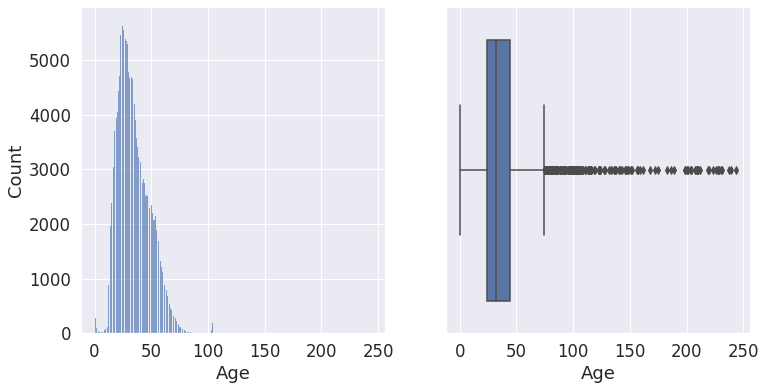

In [291]:
#Histogram showing distribution of ages
fig=plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(x='Age',data=users_df)

#boxplot of Age column
plt.subplot(1,2,2)
sns.boxplot(x='Age',data=users_df)

* Most of the users are from the age group 25-50
* It is highly unlikely to have users under the age of 4 and above 100.The peaks near 0 and 100 in the kdeplot indicates that there are some outlier values in the 'Age' column

It is highly unlikely to have users of age above 100 and below 4 in this case.So,let's replace these rows with median value of age

In [292]:
median_=users_df['Age'].median()
#replacing the outliers in 'Age' with NaN value
users_df.loc[(users_df['Age']>100)|(users_df['Age']<4),'Age']=np.nan

In [293]:
#replacing missing values (including  outliers) with the median age
users_df['Age'].fillna(median_,inplace=True)

In [294]:
#percentage of missing values in 'Age' column
(users_df['Age'].isnull().sum()/len(users_df))*100


0.0

The missing values in the 'Age' column have been imputed with the median value of Age.

Now let's inspect the 'Location' column.

In [295]:
#number of unique values in 'Location'
users_df['Location'].nunique()

57339

In [296]:
#extracting the country names from users_df
for i in users_df:
    users_df['Country']=users_df.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$')

In [297]:
#Displaying the country names
set(users_df['Country'])

{'',
 '01776',
 '02458',
 '19104',
 '23232',
 '30064',
 '85021',
 '87510',
 '_ brasil',
 'a',
 'aaa',
 'adsgfdr',
 'afghanistan',
 'ahrensburg',
 'alachua',
 'albania',
 'alderney',
 'algeria',
 'algérie',
 'allen',
 'ama lurra',
 'america',
 'american samoa',
 'andorra',
 'angola',
 'antarctica',
 'aotearoa',
 'argentina',
 'armenia',
 'aroostook',
 'aruba',
 'asturies',
 'auckland',
 'austbritania',
 'australia',
 'australii',
 'austria',
 'autralia',
 'az',
 'azerbaijan',
 'bademn würtemberg',
 'bahamas',
 'bahrain',
 'baltimore',
 'bangladesh',
 'barbados',
 'basilicata',
 'basque country',
 'bavaria',
 'baxter',
 'bbbzzzzz',
 'belarus',
 'belgi',
 'belgique',
 'belgium',
 'belize',
 'bell',
 'benin',
 'berguedà',
 'bermuda',
 'bernalillo',
 'bfe',
 'bhutan',
 'bih',
 'bkk',
 'bladen',
 'bolivia',
 'bosnia',
 'botswana',
 'brasil',
 'brazil',
 'brunei',
 'brunei darussalam',
 'bucks',
 'bulgaria',
 'buncombe',
 'burkina faso',
 'burkinafasu',
 'burlington',
 'burma',
 'butler',
 'c

In [298]:
#correcting the mispelled country names
users_df.loc[users_df['Country'].isin(['australii','autralia','western australia']), 'Country'] = 'australia'
users_df.loc[users_df['Country'].isin(['unite states','01776','02458','19104','23232','30064','85021','87510','united sates','united staes','united state','united statea','united stated','america'
                                      'united stated of america','united states','united states of america','us','us of a','us virgin islands',
                                      'usa  canada','usa currently living in england','uusa','usaa','wonderful usa','california','orange co']), 'Country'] = 'usa'
users_df.loc[users_df['Country'].isin(['united kindgdom', 'united kindgonm','united kingdom','u k']), 'Country'] = 'uk'  
users_df.loc[users_df['Country'].isin(['the philippines', 'philippines', 'philippinies', 'phillipines', 'phils', 'phippines']), 'Country'] = 'philippines'                                      
users_df.loc[users_df['Country'].isin(['','xxxxxx','universe','nowhere','x','y','a','öð¹ú','the','unknown',np.nan,'n/a','aaa','z','somewherein space']), 'Country'] = 'others'
users_df.loc[users_df['Country'].isin([ 'italia','italien','itlay']), 'Country'] = 'italy'
users_df.loc[users_df['Country'].isin([ ' china öð¹ú','chinaöð¹ú','chian']), 'Country'] = 'china'
users_df['Country'].replace([ 'the gambia','the netherlands','geermany','srilanka','saudia arabia','brasil','_ brasil','indiai','malaysian','hongkong','russian federation'], 
                            ['gambia','netherlands','germany','sri lanka','saudi arabia','brazil','brazil','india','malaysia','hong kong','russia'],inplace=True)
 


In [299]:
#Converting the country names to uppercase
users_df['Country']=users_df['Country'].str.upper()

In [300]:
#Dropping the column 'Location'
users_df.drop('Location',axis=1,inplace=True)

In [301]:
users_df.columns

Index(['User-ID', 'Age', 'Country'], dtype='object')

In [302]:
users_df.Country.value_counts()

USA           139746
CANADA         21658
UK             18565
GERMANY        17074
SPAIN          13258
               ...  
ALACHUA            1
CHINA ÖÐ¹Ú         1
MAROC              1
MÉRIDA             1
HERNANDO           1
Name: Country, Length: 473, dtype: int64

## **Ratings data**


---



### **Data description**

Contains the book rating information. Ratings (Book-Rating) are either explicit,
expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit,
expressed by 0.

In [303]:
#displaying the first 5 rows
rating_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [304]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [305]:
# checking null values
rating_df.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [306]:
# checking for unique user ids and isbn values
print('Number of unique user ids is {} and ISBN no. is {}'.format(rating_df['User-ID'].nunique(), rating_df['ISBN'].nunique()))

Number of unique user ids is 105283 and ISBN no. is 340556




> *This means that many users are buying multiple books. Also some books are really famous and hence are bought by multiple users.*



In [307]:
# checking for duplicates
rating_df[rating_df.duplicated()].sum()

User-ID        0.0
ISBN           0.0
Book-Rating    0.0
dtype: float64

In [308]:
# making all the ISBN no. uppercase
rating_df['ISBN'].apply(lambda x: x.upper())

0           034545104X
1           0155061224
2           0446520802
3           052165615X
4           0521795028
              ...     
1149775     1563526298
1149776     0679447156
1149777     0515107662
1149778     0590442449
1149779    05162443314
Name: ISBN, Length: 1149780, dtype: object

In [309]:
# lets see if all the books in rating_df are also in books_df
rating_df_new = rating_df[rating_df['ISBN'].isin(books_df['ISBN'])]

In [310]:
print('Shape of rating_df: {} and rating_df_new: {}'.format(rating_df.shape, rating_df_new.shape))

Shape of rating_df: (1149780, 3) and rating_df_new: (1030617, 3)


In [311]:
# book ratings
rating_df_new['Book-Rating'].value_counts().reset_index()

,index,Book-Rating
0,0,646974
1,8,91739
2,10,71194
3,7,66356
4,9,60754
5,5,45343
6,6,31673
7,4,7613
8,3,5117
9,2,2374




> *We can see for explicit ratings that rating 8 is recieved by most number of books followed by rating 10.*
> *There are 647294 implicitely rated books.*



In [312]:
# most popular books
rating_df_new.groupby('ISBN')['Book-Rating'].count().reset_index().sort_values(by='Book-Rating', ascending=False)[:10]

,ISBN,Book-Rating
215608,0971880107,2502
38505,0316666343,1295
70686,0385504209,883
7325,0060928336,732
32311,0312195516,723
87235,044023722X,647
21293,0142001740,615
144784,067976402X,614
132908,0671027360,586
93670,0446672211,585




> *but this contains both explicit and implicit rating, so we need to seperate them to get better idea.*



In [313]:
explicit_rating = rating_df_new[rating_df_new['Book-Rating'] != 0]
implicit_rating = rating_df_new[rating_df_new['Book-Rating'] == 0]
print('Shape of explicit rating: {} and implicit rating: {}'.format(explicit_rating.shape, implicit_rating.shape))

Shape of explicit rating: (383643, 3) and implicit rating: (646974, 3)


In [314]:
# most popular explicitely rated books
explicit_rating.groupby('ISBN')['Book-Rating'].count().reset_index().sort_values(by='Book-Rating', ascending=False)[:10]

,ISBN,Book-Rating
21915,0316666343,707
117593,0971880107,581
38771,0385504209,487
18032,0312195516,383
4122,0060928336,320
68795,059035342X,313
12303,0142001740,307
51715,0446672211,295
47910,044023722X,281
57539,0452282152,278


In [315]:
# getting the book names corresponding to these ISBNs
isbn_nums = ['0316666343', '0971880107', '0385504209', '0312195516', '0060928336']
books_df[books_df['ISBN'].isin(isbn_nums)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
26,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
408,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...
522,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...
748,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...
1105,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...




> *therefore the most popular book is 'The Lovely Bones: A Novel'*



## **Merging Datasets**

---






In [316]:
# for the rating dataset, we are only taking the explicit rating dataset

books_rating_df = pd.merge(books_df, explicit_rating, on='ISBN', how='inner')
df = pd.merge(books_rating_df, users_df, on='User-ID', how='inner')

In [317]:
#shape of the merged dataframe 'df'
df.shape

(388987, 12)

In [318]:
#displaying the top 3 rows of df
df.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Age,Country
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,32.0,CANADA
1,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,8,5,32.0,CANADA
2,0887841740,The Middle Stories,Sheila Heti,2004,House of Anansi Press,http://images.amazon.com/images/P/0887841740.0...,http://images.amazon.com/images/P/0887841740.0...,http://images.amazon.com/images/P/0887841740.0...,8,5,32.0,CANADA


In [319]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388987 entries, 0 to 388986
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 388987 non-null  object 
 1   Book-Title           388987 non-null  object 
 2   Book-Author          388987 non-null  object 
 3   Year-Of-Publication  388987 non-null  object 
 4   Publisher            388987 non-null  object 
 5   Image-URL-S          388987 non-null  object 
 6   Image-URL-M          388987 non-null  object 
 7   Image-URL-L          388987 non-null  object 
 8   User-ID              388987 non-null  int64  
 9   Book-Rating          388987 non-null  int64  
 10  Age                  388987 non-null  float64
 11  Country              388987 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 38.6+ MB


In [320]:
#Number of users who have rated the books
df['User-ID'].nunique()

68080

In [321]:
#Number of books in the dataframe
df['ISBN'].nunique()

149655

## **Exploratory Data Analysis**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

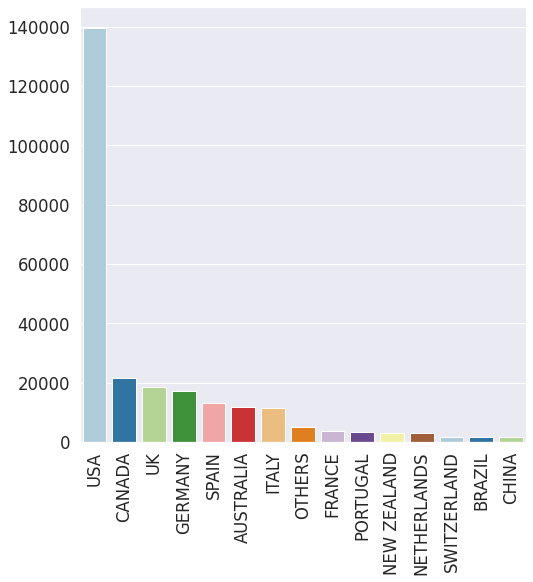

In [322]:
#Countries with maximum number of users
top10=users_df['Country'].value_counts().nlargest(15)
sns.barplot(x=top10.index,y=top10.values,palette='Paired')
plt.xticks(rotation=90)

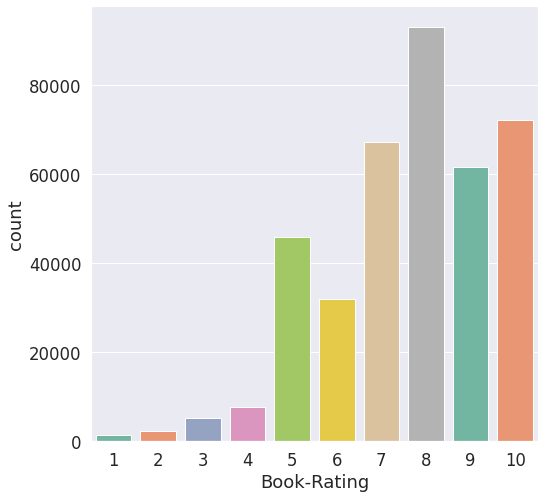

In [323]:
#Rating distribution

sns.countplot(x='Book-Rating',data=df,palette='Set2')

## *Book authors who have written the most books*

Text(0.5, 1.0, 'Top ten writers in terms of number of books published')

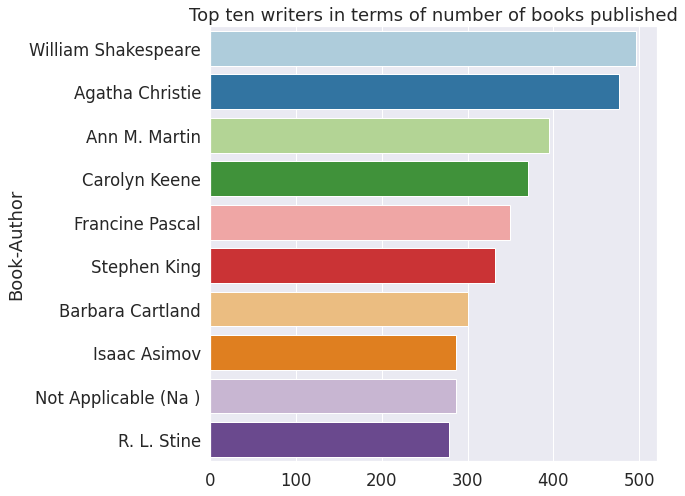

In [324]:


#Authored the most number of  books 

popular_authors=books_df.groupby('Book-Author')['Book-Title'].nunique().nlargest(10)
sns.barplot(x=popular_authors.values,y=popular_authors.index,palette='Paired')
plt.title('Top ten writers in terms of number of books published')

  
# #Best selling authors
# plt.subplot(1,2,2)
# books_rating_df_1 = pd.merge(books_df, rating_df_new, on='ISBN', how='inner')
# best_selling_authors=books_rating_df_1.groupby('Book-Author')['User-ID'].nunique().nlargest(10)
# sns.barplot(x=best_selling_authors.values,y=best_selling_authors.index,palette='Paired')
# plt.title('Best selling authors')
# plt.tight_layout()

Text(0.5, 1.0, 'Top ten publishers in terms of number of books published')

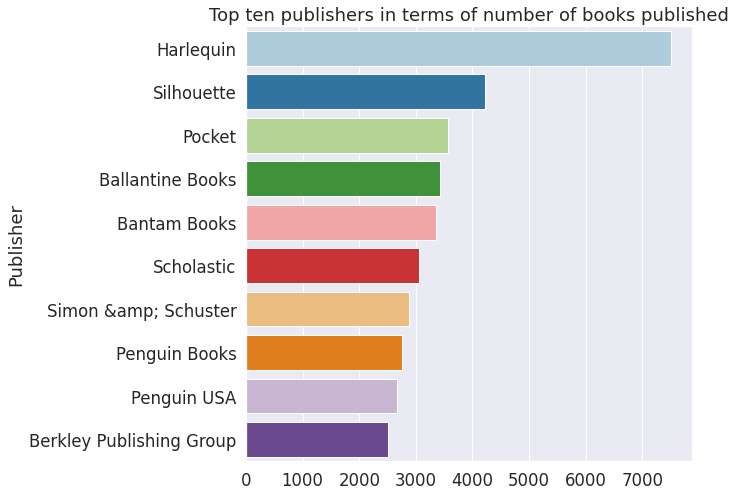

In [325]:
#Companies with the most number of books published
popular_publishers=books_df.groupby('Publisher')['Book-Title'].nunique().nlargest(10)
sns.barplot(x=popular_publishers.values,y=popular_publishers.index,palette='Paired')
plt.title('Top ten publishers in terms of number of books published')

In [326]:
# #Top publishers
# sns.set(font_scale =1.5)
# popular_authors=books_df['Publisher'].value_counts().nlargest(10)
# axes=sns.barplot(x=popular_authors.values,y=popular_authors.index,palette='Paired')


In [327]:
# #Authors with the most number of written books 
# sns.set(font_scale =1.5)
# popular_authors=books_df['Book-Author'].value_counts().nlargest(10)
# axes=sns.barplot(x=popular_authors.values,y=popular_authors.index,palette='Paired')

In [328]:
df.groupby('Book-Title')['User-ID'].count().nlargest(10)

Book-Title
The Lovely Bones: A Novel                                           707
A Painted House                                                     646
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))    626
Wild Animus                                                         581
Snow Falling on Cedars                                              530
The Da Vinci Code                                                   494
The Firm                                                            430
Harry Potter and the Order of the Phoenix (Book 5)                  416
The Secret Life of Bees                                             406
The Nanny Diaries: A Novel                                          393
Name: User-ID, dtype: int64

Text(0.5, 1.0, 'Top selling books')

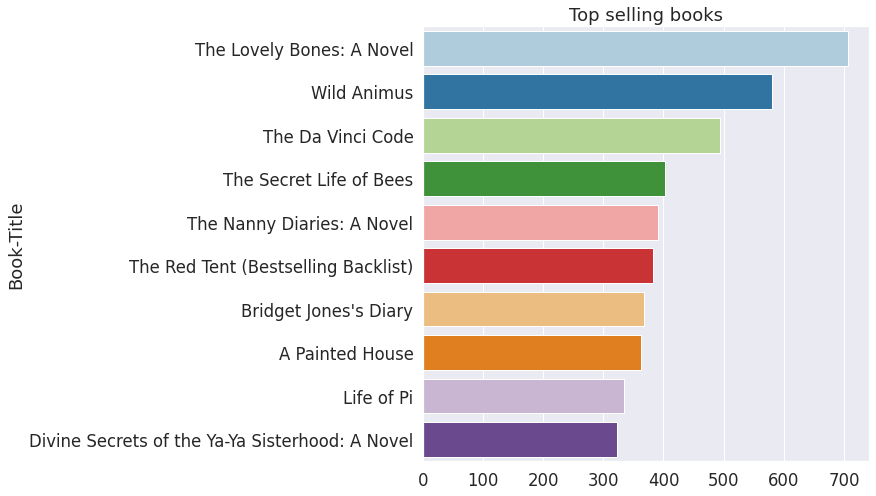

In [329]:
#Top selling books 
most_purchased_books=df.groupby('Book-Title')['User-ID'].nunique().nlargest(10)
sns.barplot(x=most_purchased_books.values,y=most_purchased_books.index,palette='Paired')
plt.title('Top selling books')

Text(0.5, 1.0, 'Top rated books')

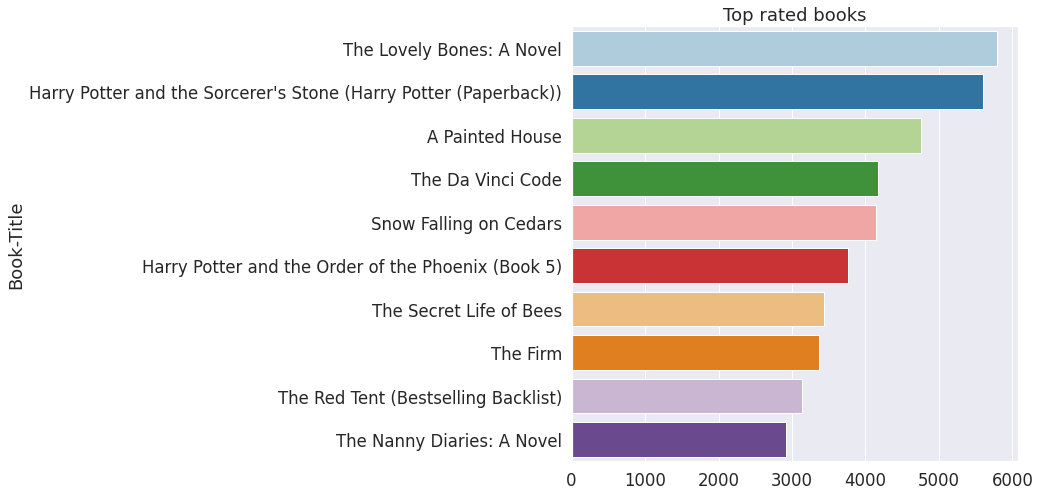

In [330]:
#Top-rated books
top_rated_books=df.groupby('Book-Title')['Book-Rating'].sum().nlargest(10)
sns.barplot(x=top_rated_books.values,y=top_rated_books.index,palette='Paired')
plt.title('Top rated books')


In [331]:
def age_group(age):
  ''' 
  defines the age group of users
  '''
  if age<13:
    x='Children'
  elif age>=13 and age<18:
    x='Teens'
  elif age>=18 and age<36:
    x='Youth'
  elif age>=36 and age<56:
    x='Middle aged adults'
  else:
    x='Elderly'
  return x

In [332]:
df['Age_group']=df['Age'].apply(lambda x: age_group(x))

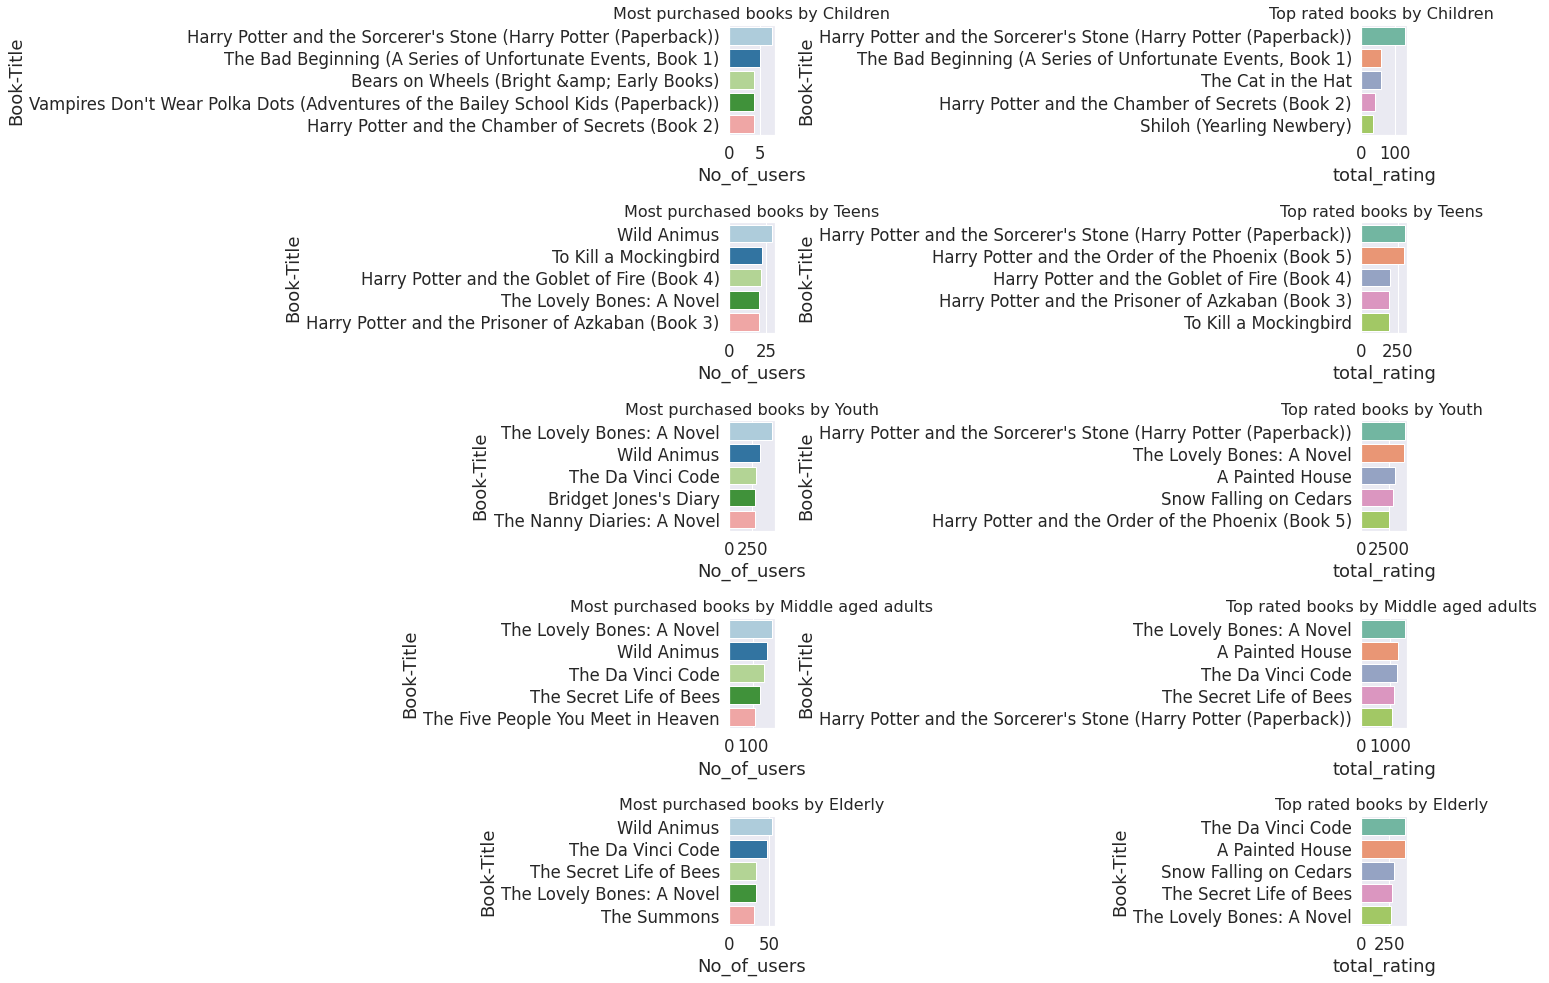

In [333]:
fig=plt.figure(figsize=(20,14))
i=1
for group  in ['Children','Teens','Youth','Middle aged adults','Elderly']:
  age_df=df.loc[df['Age_group']==group].groupby(['Book-Title']).agg(No_of_users=('User-ID','nunique'),total_rating=('Book-Rating','sum')).reset_index() 
  plt.subplot(5,2,i)
  age_df.sort_values(by='No_of_users',ascending=False,inplace=True)
  sns.barplot(x='No_of_users',y='Book-Title',palette='Paired',data=age_df.head(5))
  plt.title('Most purchased books by {}'.format(group),size=16)
  i+=1
  plt.subplot(5,2,i)
  age_df.sort_values(by='total_rating',ascending=False,inplace=True)
  sns.barplot(x='total_rating',y='Book-Title',palette='Set2',data=age_df.head(5))
  plt.title('Top rated books by {} '.format(group),size=16)
  i+=1
  
plt.tight_layout()

https://www.isbn-international.org/content/isbn-assignment#:~:text=The%20ISBN%20identifies%20not%20only,ISBNs%20to%20the%20new%20publication.

In [334]:
df1=books_df.groupby(['ISBN','Book-Title'],as_index=[False,False])['ISBN'].count().to_frame(name='Copies')
dup=df1[df1['Copies']>1].sort_values(by='Copies',ascending=False)
dup

,,Copies
ISBN,Book-Title,
000225669X,One Thousand Chestnut Trees,2
067168289X,IF THERE BE THORNS (Dollanger Saga (Paperback)),2
067178546X,Blue Gold : A Novel from the NUMA Files,2
067174674X,SECRETS CAN KILL (NANCY DREW FILES 1) : SECRETS CAN KILL (Nancy Drew Files),2
067174352X,"The Wounded Sky (Star Trek, No 13)",2
...,...,...
039505155X,"Selected Shorter Writings of Mark Twain (Riverside Editions, A58)",2
039480001X,The Cat in the Hat,2
039475929X,Babette's Feast &amp; Other Anecdotes of Destiny,2


In [335]:
df2=books_df.groupby(['Book-Title','ISBN'],as_index=[False,False])['ISBN'].count().to_frame(name='Copies')
dup=df2[df2['Copies']>1].sort_values(by='Copies',ascending=False)
dup

,,Copies
Book-Title,ISBN,
A Bright Room Called Day,155936078X,2
SECRETS CAN KILL (NANCY DREW FILES 1) : SECRETS CAN KILL (Nancy Drew Files),067174674X,2
Send Bygraves,039913462X,2
"Selected Shorter Writings of Mark Twain (Riverside Editions, A58)",039505155X,2
Savage Justice,006100684X,2
...,...,...
Hallucinating Foucault,033035177X,2
Gulliver's Travels and Other Writings (Bantam Classics),055321232X,2
Guilty Pleasures (Anita Blake Vampire Hunter (Paperback)),051513449X,2


In [336]:
from IPython.display import Image, HTML   #Displaying images